# Comprobar estacionariedad

# Dickey-Fuller

Neural Networck
¿Cuándo debería usar Random Forest versus una red neuronal? Random Forest es menos costoso computacionalmente y no requiere una GPU para terminar el entrenamiento. Un bosque aleatorio puede brindarle una interpretación diferente de un árbol de decisión pero con un mejor rendimiento. Las redes neuronales requerirán muchos más datos de los que una persona común podría tener a mano para ser realmente efectivos. La red neuronal simplemente diezmará la interpretabilidad de sus funciones hasta el punto en que pierda sentido por el bien del rendimiento. Si bien eso puede sonar razonable para algunos, depende de cada proyecto. Si el objetivo es crear un modelo de predicción sin preocuparse por las variables en juego, utilice una red neuronal, pero necesitará los recursos para hacerlo. Si se requiere una comprensión de las variables, nos guste o no, por lo general, lo que sucede en esta situación es que el rendimiento tendrá que recibir un pequeño golpe para asegurarse de que aún podamos entender cómo cada variable está contribuyendo al modelo de predicción

Comprobar estacionariedad (2 tests) (stationarity) OJO con la hipótesis nula

https://machinelearningmastery.com/time-series-data-stationary-python/

https://www.analyticsvidhya.com/blog/2021/04/how-to-check-stationarity-of-data-in-python/

Las series de tiempo son estacionarias si no tienen efectos de tendencia o estacionales. Las estadísticas de resumen calculadas en la serie temporal son coherentes a lo largo del tiempo, como la media o la varianza de las observaciones.

In [2]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import datetime 

url ="https://raw.githubusercontent.com/albercol/TFG/main/Fase2/Fase%202.3/DatosUnificados/Cont_Meteo_Traf.csv"
df = pd.read_csv(url,parse_dates=['FECHAH'])
df = df.dropna()
#df["hora"] = df['FECHAH'].dt.hour

valores = df.TIPO.unique()
for v in valores:
    print(v)
    df[v] = df.TIPO.apply(lambda x: 1 if x==v else 0)

#df = df.drop(['FECHAH', 'TIPO'], axis=1)
index=df.set_index(['FECHAH'])
index


LABORABLE
SABADO
DOMINGO
FESTIVO


,TIPO,CO,NO,NO2,PM2.5,PM10,NOx,O3,VELOCIDAD VIENTO,DIR. VIENTO,...,HUMEDAD RELATIVA,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,ESSUMA,LABORABLE,SABADO,DOMINGO,FESTIVO
FECHAH,,,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,LABORABLE,0.2,4.0,22.0,10.0,19.0,29.0,58.87,1.84,97.0,...,52.0,943.0,0.0,223.0,347.0,570.0,1,0,0,0
2019-08-01 01:00:00,LABORABLE,0.2,2.0,15.0,10.0,21.0,18.0,63.73,1.97,117.0,...,55.0,943.0,0.0,173.0,231.0,404.0,1,0,0,0
2019-08-01 02:00:00,LABORABLE,0.1,4.0,14.0,9.0,18.0,19.0,66.50,1.72,96.0,...,55.0,943.0,0.0,107.0,180.0,287.0,1,0,0,0
2019-08-01 03:00:00,LABORABLE,0.1,1.0,14.0,10.0,18.0,15.0,66.62,1.55,106.0,...,55.0,943.0,0.0,80.0,129.0,209.0,1,0,0,0
2019-08-01 04:00:00,LABORABLE,0.2,2.0,15.0,10.0,19.0,18.0,62.57,1.13,67.0,...,57.0,943.0,0.0,89.0,105.0,194.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25 10:00:00,LABORABLE,0.3,18.0,38.0,9.0,18.0,66.0,47.20,1.37,79.0,...,46.0,953.0,0.0,587.0,658.0,1245.0,1,0,0,0
2021-05-25 11:00:00,LABORABLE,0.3,17.0,37.0,7.0,16.0,62.0,60.22,1.93,62.0,...,42.0,953.0,0.0,582.0,651.0,1233.0,1,0,0,0
2021-05-25 12:00:00,LABORABLE,0.2,11.0,31.0,7.0,16.0,49.0,73.93,1.53,12.0,...,38.0,952.0,0.0,573.0,743.0,1316.0,1,0,0,0


### Representacion de los datos para observar graficamente que son datos estacionarios.

mean1=3.411427, mean2=3.537318
variance1=0.626383, variance2=0.486343


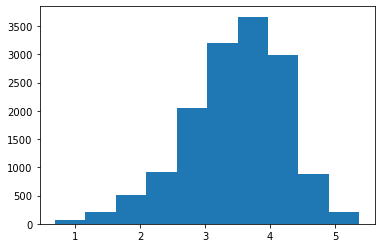

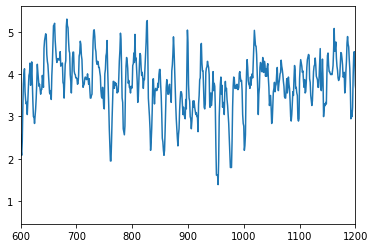

In [3]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import log
import matplotlib.pyplot as plt
%matplotlib inline

coly = ["NO2"]
X = df[coly].values
X = log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

pyplot.hist(X)
pyplot.show()

plt.xlim(600,1200)
pyplot.plot(X)
pyplot.show()

Como parte del resultado, obtenemos una tabla de consulta para ayudar a determinar la estadística ADF. Podemos ver que nuestro valor estadístico de -10.26 es menor que el valor de -3.431 al 1%.

Esto sugiere que podemos rechazar la hipótesis nula con un nivel de significancia de menos del 1% (es decir, una baja probabilidad de que el resultado sea una casualidad estadística).

Rechazar la hipótesis nula significa que el proceso no tiene raíz unitaria y, a su vez, que la serie temporal es estacionaria o no tiene una estructura dependiente del tiempo.

p-value > 0.05: No se puede rechazar la hipótesis nula (H0), los datos tienen raíz unitaria y no son estacionarios.

p-value <= 0.05: Rechazar la hipótesis nula (H0), los datos no tienen raíz unitaria y son estacionarios.

In [12]:
def dickey_fuller(df, coly):
    df = df[coly]
    result = adfuller(df)
    print("Para: ", coly)
    print('ADF Statistic: %f' % result[0])
    print('p-value: ', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] <= 0.5:
        print("Rechazamos la hipótesis nula, los datos no tienen raíz unitaria y son estacionarios.")
        print()
    else:
        print("No se puede rechazar la hipótesis nula, los datos tienen raíz unitaria y no son estacionarios.")
        print()

In [13]:
colContaminantes = ["CO","NO2", "PM2.5", "O3"]
for i in range(len(colContaminantes)):
    dickey_fuller(df, colContaminantes[i])

Para:  CO
ADF Statistic: -8.768627
p-value:  2.5567708522140714e-14
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Rechazamos la hipótesis nula, los datos no tienen raíz unitaria y son estacionarios.

Para:  NO2
ADF Statistic: -10.264429
p-value:  4.1548809304732636e-18
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Rechazamos la hipótesis nula, los datos no tienen raíz unitaria y son estacionarios.

Para:  PM2.5
ADF Statistic: -8.970265
p-value:  7.788156002450207e-15
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Rechazamos la hipótesis nula, los datos no tienen raíz unitaria y son estacionarios.

Para:  O3
ADF Statistic: -7.852976
p-value:  5.537579246293036e-12
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Rechazamos la hipótesis nula, los datos no tienen raíz unitaria y son estacionarios.



In [14]:
ClimatTraf = [  'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
           'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10','ES53']
for i in range(len(ClimatTraf)):
    dickey_fuller(df, ClimatTraf[i])

Para:  VELOCIDAD VIENTO
ADF Statistic: -11.303394
p-value:  1.2908663610363708e-20
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Rechazamos la hipótesis nula, los datos no tienen raíz unitaria y son estacionarios.

Para:  DIR. VIENTO
ADF Statistic: -9.838135
p-value:  4.833494648182885e-17
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Rechazamos la hipótesis nula, los datos no tienen raíz unitaria y son estacionarios.

Para:  TEMPERATURA
ADF Statistic: -3.493716
p-value:  0.008149965517626399
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Rechazamos la hipótesis nula, los datos no tienen raíz unitaria y son estacionarios.

Para:  HUMEDAD RELATIVA
ADF Statistic: -5.501909
p-value:  2.0622289782079447e-06
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Rechazamos la hipótesis nula, los datos no tienen raíz unitaria y son estacionarios.

Para:  PRESION BAROMETRICA
ADF Statistic: -8.602765
p-value:  6.79850677364883e-14
Critical Values:
	1%: -3.431
	5%: -2.862


## Rolling Statistics Test

Rolling Statistic test for: CO


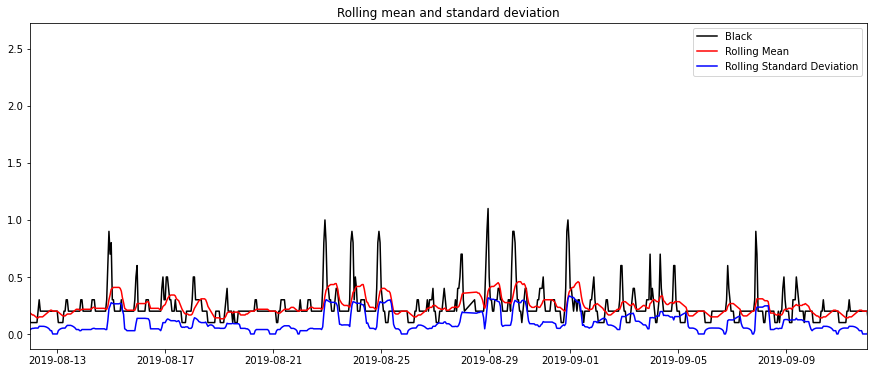

Rolling Statistic test for: NO2


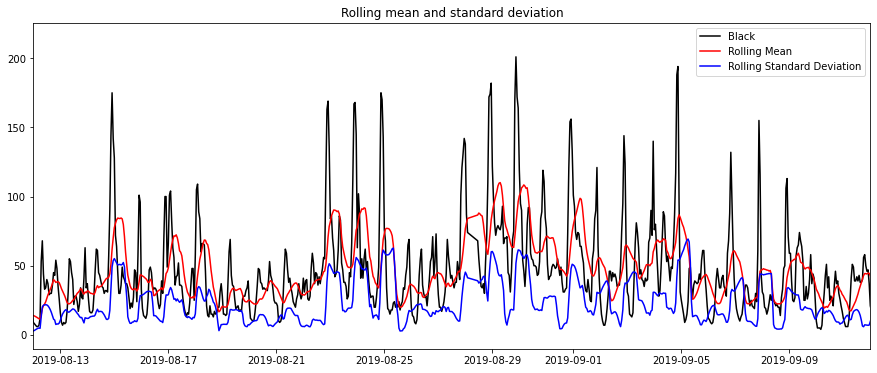

Rolling Statistic test for: PM2.5


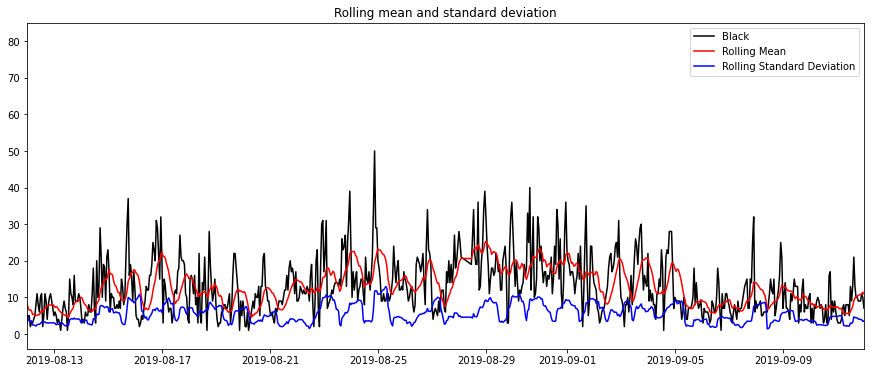

Rolling Statistic test for: O3


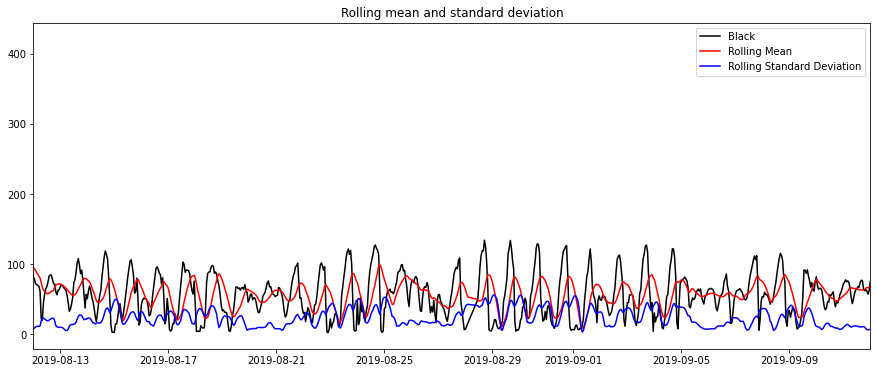

In [16]:
def rollingGraf(cont):
    df_cont = index[cont]
    rmean=df_cont.rolling(window=12).mean()
    rstd=df_cont.rolling(window=12).std()
    #print(rmean,rstd)
    plt.figure(figsize=(15,6))
    orig=plt.plot(df_cont , color='black',label='Black')
    mean= plt.plot(rmean , color='red',label='Rolling Mean')
    std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.xlim([datetime.date(2019, 8, 12), datetime.date(2019, 9, 12)])
    plt.title("Rolling mean and standard deviation")
    plt.show(block=False)

for i in range(len(colContaminantes)):
    print("Rolling Statistic test for:", colContaminantes[i])
    rollingGraf(colContaminantes[i])